# SVM notebook

### Imports

In [89]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Load datasets

In [90]:
wpbc_original = pd.read_csv(
    '../dataset/wpbc_original_B.csv',
    sep=',',
    header=0
)
wpbc_original

wpbc_normalized = pd.read_csv(
    '../dataset/wpbc_normalized_B.csv',
    sep=',',
    header=0
)
wpbc_normalized

wpbc_best = pd.read_csv(
    '../dataset/wpbc_best_features_B.csv',
    sep=',',
    header=0
)

In [91]:
(original_train, original_test) = train_test_split(wpbc_original, test_size=0.25, train_size=0.75, shuffle=True)

original_train_labels = original_train['OUTCOME']
original_train_features = original_train.iloc[:,2:]
original_test_labels = original_test['OUTCOME']
original_test_features = original_test.iloc[:,2:]

(normalized_train, normalized_test) = train_test_split(wpbc_normalized, test_size=0.25, train_size=0.75, shuffle=True)

normalized_train_labels = normalized_train['OUTCOME']
normalized_train_features = normalized_train.iloc[:,2:]
normalized_test_labels = normalized_test['OUTCOME']
normalized_test_features = normalized_test.iloc[:,2:]

(best_train, best_test) = train_test_split(wpbc_best, test_size=0.25, train_size=0.75, shuffle=True)

best_train_labels = normalized_train['OUTCOME']
best_train_features = normalized_train.iloc[:,2:]
best_test_labels = normalized_test['OUTCOME']
best_test_features = normalized_test.iloc[:,2:]

# Model development

In [92]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

## Original dataset

### SVC dev

In [93]:
svc_classifier = SVC(
    C=10,
    kernel='linear',
    gamma='auto'
)

svc_classifier.fit(
    X=original_train_features,
    y=original_train_labels
)

predictions = svc_classifier.predict(
    X=original_test_features
)
report = classification_report(
    y_true=original_test_labels,
    y_pred=predictions
)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        31
           1       0.71      0.71      0.71        45

    accuracy                           0.66        76
   macro avg       0.65      0.65      0.65        76
weighted avg       0.66      0.66      0.66        76



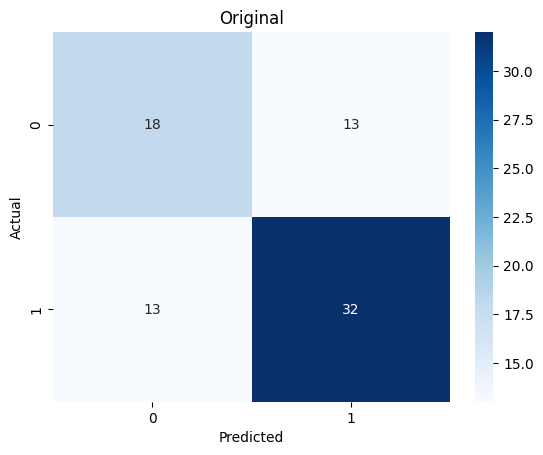

In [94]:
plot_confusion_matrix(original_test_labels, predictions, 'Original')

## Normalized dataset

In [95]:
svc_classifier.fit(
    X=normalized_train_features,
    y=normalized_train_labels
)

predictions = svc_classifier.predict(
    X=normalized_test_features
)
report = classification_report(
    y_true=normalized_test_labels,
    y_pred=predictions
)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        34
           1       0.69      0.64      0.67        42

    accuracy                           0.64        76
   macro avg       0.64      0.64      0.64        76
weighted avg       0.65      0.64      0.65        76



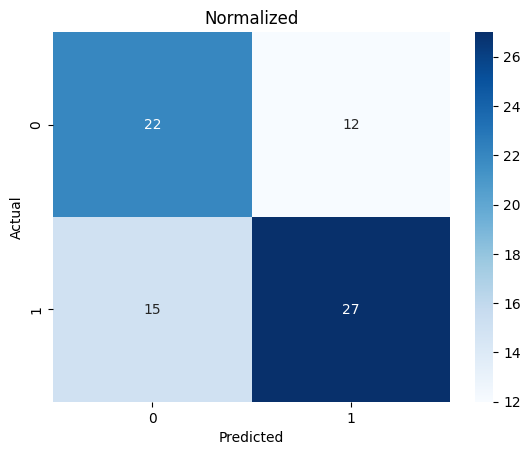

In [96]:
plot_confusion_matrix(normalized_test_labels, predictions, 'Normalized')

## Best features dataset

In [97]:
svc_classifier.fit(
    X=best_train_features,
    y=best_train_labels
)

predictions = svc_classifier.predict(
    X=best_test_features
)
report = classification_report(
    y_true=best_test_labels,
    y_pred=predictions
)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        34
           1       0.69      0.64      0.67        42

    accuracy                           0.64        76
   macro avg       0.64      0.64      0.64        76
weighted avg       0.65      0.64      0.65        76



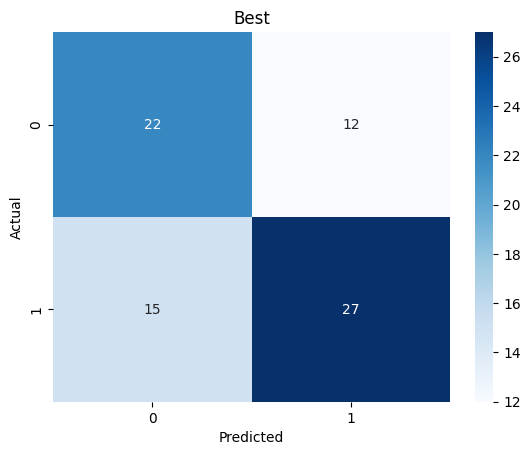

In [98]:
plot_confusion_matrix(best_test_labels, predictions, 'Best')